In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.set_default_dtype(torch.float64)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
df = pd.read_csv("./data_synthetic/synth_data_1var_poi.csv", index_col=0)
df

,X,y
0,1,0.002686
1,1,0.002753
2,1,0.003596
3,1,0.003369
4,1,0.002748
...,...,...
145,18,0.000241
146,18,0.000385
147,18,0.000939
148,18,0.000155


In [62]:
X = torch.tensor(df["X"], dtype=torch.float64).reshape(-1, 1)
y = torch.tensor(df["y"], dtype=torch.float64).reshape(-1, 1)

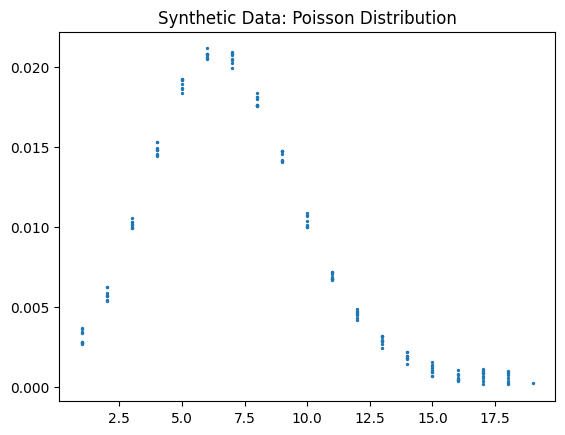

In [63]:
plt.scatter(X,y,s=2)
plt.title("Synthetic Data: Poisson Distribution")
plt.show()

In [64]:
class NN(nn.Module):

    def __init__(self):
        super(NN, self).__init__()
        self.hidden = nn.Linear(1, 25)
        self.relu = nn.ReLU()
        self.output = nn.Linear(25, 1)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

In [65]:
model = NN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = torch.tensor(X_train.detach().numpy(), dtype=torch.float64).reshape(-1,1)
y_train = torch.tensor(y_train.detach().numpy(), dtype=torch.float64).reshape(-1,1)

In [67]:
num_epochs = 20000

for epoch in range(num_epochs):

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')

Epoch [1/20000], Loss: 15.74230430
Epoch [2/20000], Loss: 12.35448615
Epoch [3/20000], Loss: 9.41406831
Epoch [4/20000], Loss: 6.91472545
Epoch [5/20000], Loss: 4.84473653
Epoch [6/20000], Loss: 3.18657204
Epoch [7/20000], Loss: 1.91659319
Epoch [8/20000], Loss: 1.00467227
Epoch [9/20000], Loss: 0.41374008
Epoch [10/20000], Loss: 0.09957537
Epoch [11/20000], Loss: 0.01127903
Epoch [12/20000], Loss: 0.09283424
Epoch [13/20000], Loss: 0.28598181
Epoch [14/20000], Loss: 0.53428365
Epoch [15/20000], Loss: 0.78773051
Epoch [16/20000], Loss: 1.00680337
Epoch [17/20000], Loss: 1.16491181
Epoch [18/20000], Loss: 1.24872798
Epoch [19/20000], Loss: 1.25669907
Epoch [20/20000], Loss: 1.19642764
Epoch [21/20000], Loss: 1.08160697
Epoch [22/20000], Loss: 0.92920308
Epoch [23/20000], Loss: 0.75698187
Epoch [24/20000], Loss: 0.58159591
Epoch [25/20000], Loss: 0.41721981
Epoch [26/20000], Loss: 0.27472066
Epoch [27/20000], Loss: 0.16116505
Epoch [28/20000], Loss: 0.07988832
Epoch [29/20000], Loss: 0.0

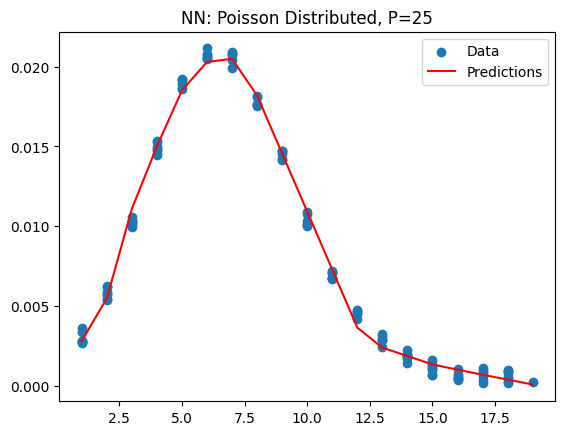

In [68]:
y_pred = model(X)

plt.scatter(X_train, y_train, label='Data')
# Sort X_test and y_pred based on X_test
sorted_indices = torch.argsort(X, dim=0).squeeze()
X_test_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(X_test_sorted, y_pred_sorted.detach().numpy(), label='Predictions', color='red')
plt.legend()
plt.title('NN: Poisson Distributed, P=25')
plt.show()